# Generate Example Visuals
See Software Documentation (https://anl-ceeesa.github.io/RELOG/0.5/usage/) for Additional Examples

Python Dependencies: Pandas, Seaborn

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
sns.set_style("white")

In [2]:
#problem = "initial"
problem = "cui"


### Plant Costs

#### Total Costs

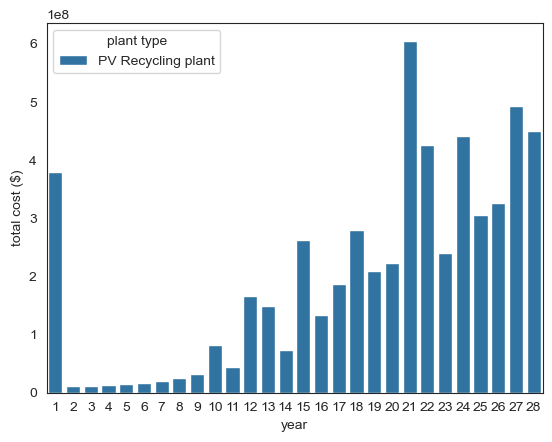

In [3]:
data = pd.read_csv(f"output/{problem}/plants.csv")
sns.barplot(
    x="year",
    y="total cost ($)",
    hue="plant type",
    data=data.groupby(["plant type", "year"]).sum().reset_index(),
)
plt.savefig(f"figures/{problem}/plant_costs.pdf", dpi=300);

#### Cost Breakdown

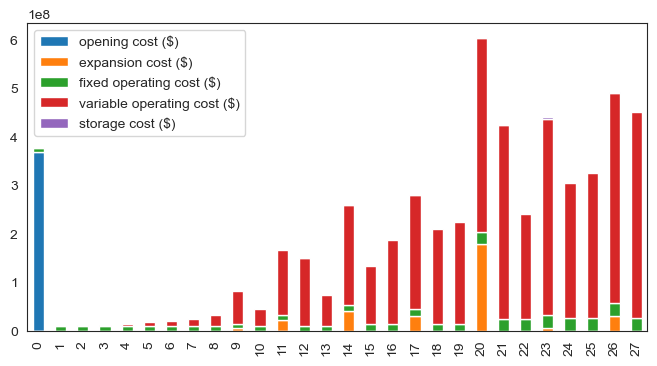

In [4]:
columns = [
    "opening cost ($)",
    "expansion cost ($)",
    "fixed operating cost ($)",
    "variable operating cost ($)",
    "storage cost ($)",
]
data = pd.read_csv(f"output/{problem}/plants.csv")
df = data.groupby(["plant type", "year"]).sum().reset_index()
df[columns].plot(kind="bar", stacked=True, figsize=(8, 4))
plt.savefig(f"figures/{problem}/plant_costs_breakdown.pdf", dpi=300);

### Transportation Data

**Troubleshoot if there is an error importing geopandas**

1) Install the following packages in your environment:
* ```conda install gdal```
* ```conda install fiona```
* ```conda install geopandas```

2) Import `fiona` *before* `geopandas`.
3) If you get a library not found, use [this workaround](https://stackoverflow.com/questions/71088072/installing-geopandas-on-apple-m1-chip) to solve it. In short, look for a library with similar same as the one that is not found, make a copy and name it as the one that it wants to find. In my case, it was looking for `libLerc.4.dylib` located in `/Users/mmendez/miniconda3/envs/RELOG/lib`. So I found the file `libLerc.dylib` and renamed it as `libLerc.4.dylib` and it worked! Wohoo!

*Note: This is most likely an error for M1 apple users.*

In [5]:
import fiona
import geopandas as gp
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import collections
from shapely.geometry import LineString, Point

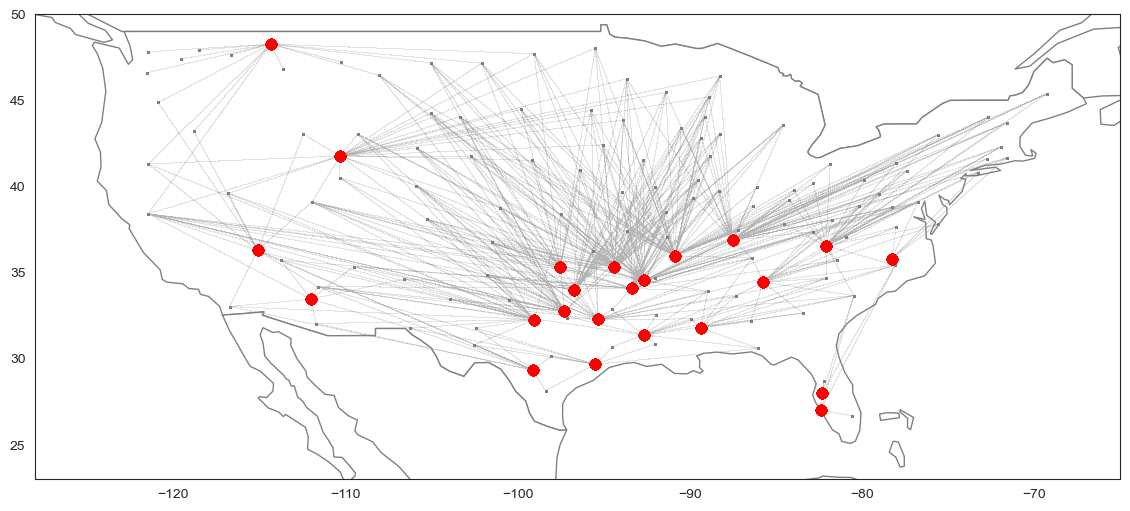

In [7]:
# Plot base map
world = gp.read_file(gp.datasets.get_path("naturalearth_lowres"))
ax = world.plot(color="white", edgecolor="0.5", figsize=(14, 7))
ax.set_ylim([23, 50])
ax.set_xlim([-128, -65])

# Draw transportation lines
data = pd.read_csv(f"output/{problem}/transportation.csv")
lines = [
    [
        (
            row["source longitude (deg)"],
            row["source latitude (deg)"],
        ),
        (
            row["destination longitude (deg)"],
            row["destination latitude (deg)"],
        ),
    ]
    for (index, row) in data.iterrows()
]
ax.add_collection(
    collections.LineCollection(
        lines,
        linewidths=0.01,
        zorder=1,
        alpha=0.5,
        color="0.7",
    )
)

# Draw source points
points = gp.points_from_xy(
    data["source longitude (deg)"],
    data["source latitude (deg)"],
)
gp.GeoDataFrame(data, geometry=points).plot(ax=ax, color="0.5", markersize=1)

# Draw destination points
points = gp.points_from_xy(
    data["destination longitude (deg)"],
    data["destination latitude (deg)"],
)
gp.GeoDataFrame(data, geometry=points).plot(ax=ax, color="red", markersize=50)
plt.savefig(f"figures/{problem}/recycling_logistics.pdf", dpi=300);
plt.savefig(f"figures/{problem}/recycling_logistics.png", dpi=300);